In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def train_test_split(features,target):
    if len(features) == len(target):
        train_len = int(len(features)*0.7)
        test_len = int(len(features)*0.3)
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        for i in range(train_len):
            X_train.append(features[i])  #the index value we append in X_train , In Y_train also the index element must be same
            Y_train.append(target[i])
        for i in range(train_len,len(features)):
            X_test.append(features[i])
            Y_test.append(target[i])
        return np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)
            
    else:
        return "Length is not equal of both features and target....."

In [8]:
feature = np.linspace(50,100,500)
target = feature*0.2 + np.random.randn(500)

In [10]:
plt.rcParams['figure.figsize'] = 11,5

In [11]:
plt.style.use("ggplot")

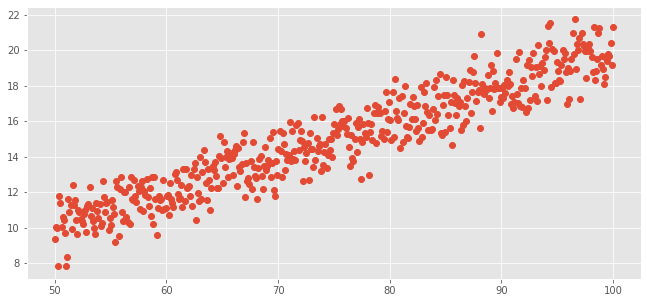

In [12]:
plt.plot(feature,target,'o')
plt.show()

In [53]:
class LinearRegression:
    def __init__(self):
        self.features = None
        self.target = None
        self.coeff_ = None
        self.intercept_ = None
    
    def fit(self,feature,target): #always train the model 
        """
            In this fit will train the data and return the values of coeff_ and intercept_
        """
        self.features = feature
        self.target = target
        self.coeff_ = ((self.features - self.features.mean()) * (self.target - self.target.mean())).sum() / ((self.features - self.features.mean())**2).sum()
        self.intercept_ = abs(target.mean() - (self.coeff_ * feature.mean()))
        
    def mae(self,actual,predict):
        mae = (abs(actual - predict)).sum() / len(actual)
        return mae
    
    def mse(self,actual,predict):
        mse = ((actual - predict)**2).sum() / len(actual)
        return mse
    
    def predict(self,test):
        self.pred = self.intercept_ + (self.coeff_ * test)
        return self.pred
    

In [54]:
model = LinearRegression()

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target)

In [28]:
X_train[:5]

array([50.       , 50.1002004, 50.2004008, 50.3006012, 50.4008016])

In [29]:
len(X_train)

350

In [30]:
len(X_test)

150

In [31]:
X_test[:5]

array([85.07014028, 85.17034068, 85.27054108, 85.37074148, 85.47094188])

In [32]:
len(Y_train)

350

In [33]:
len(Y_test)

150

In [34]:
Y_test[:5]

array([18.47425741, 17.45921338, 16.33936638, 15.59737879, 17.09577997])

In [55]:
model.fit(X_train,Y_train)  #fitting in which you train the model and find the required values

In [56]:
model.coeff_

0.19422397543273334

In [57]:
model.intercept_

0.39542192886890426

In [58]:
pred = model.predict(X_test)

In [59]:
actual = Y_test

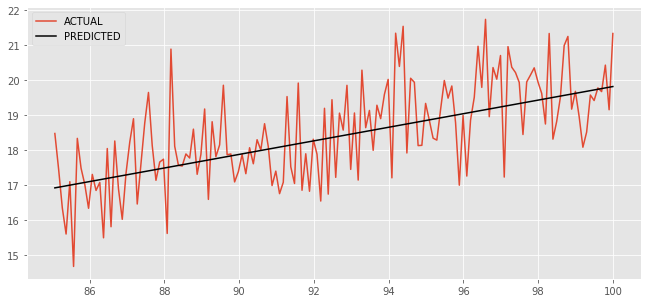

In [46]:
plt.plot(X_test,Y_test,label="ACTUAL")
plt.plot(X_test,pred,'k',label="PREDICTED")
plt.legend()
plt.show()

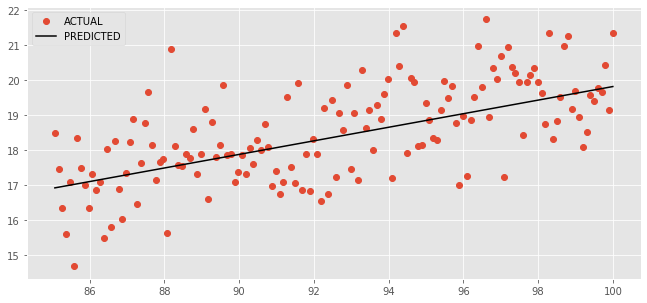

In [47]:
plt.plot(X_test,Y_test,'o',label="ACTUAL")
plt.plot(X_test,pred,'k',label="PREDICTED")
plt.legend()
plt.show()

In [48]:
y_pred = model.predict(X_train)

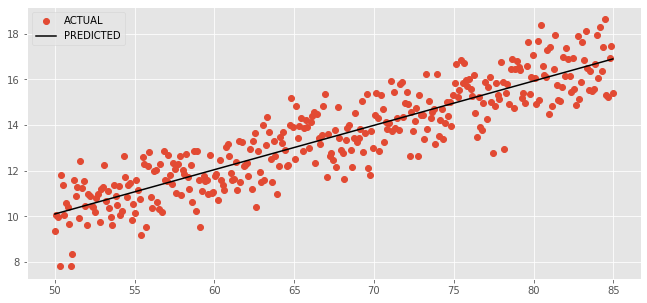

In [49]:
plt.plot(X_train,Y_train,'o',label="ACTUAL")
plt.plot(X_train,y_pred,'k',label="PREDICTED")
plt.legend()
plt.show()

In [60]:
model.mae(actual,pred)

0.8617816494022573

In [61]:
model.mae(Y_train,y_pred)

0.8033424935849307

In [62]:
model.mse(actual,pred)

1.1884606984608534

In [63]:
model.mse(Y_train,y_pred)

0.9615187020616138

In [64]:
class LinearRegression:
    def __init__(self):
        self.features = None
        self.target = None
        self.coeff_ = None
        self.intercept_ = None
    
    def fit(self,feature,target): #always train the model 
        """
            In this fit will train the data and return the values of coeff_ and intercept_
        """
        self.features = feature
        self.target = target
        self.coeff_ = ((self.features - self.features.mean()) * (self.target - self.target.mean())).sum() / ((self.features - self.features.mean())**2).sum()
        self.intercept_ = abs(target.mean() - (self.coeff_ * feature.mean()))
        
    def mae(self,actual,predict):
        mae = (abs(actual - predict)).sum() / len(actual)
        return mae
    
    def mse(self,actual,predict):
        mse = ((actual - predict)**2).sum() / len(actual)
        return mse
    
    def predict(self,test):
        self.pred = self.intercept_ + (self.coeff_ * test)
        return self.pred
    
    def r2_score(self,actual,predict):
        mse = self.mse(actual,predict)
        r2 = 1 - (mse/((actual - predict)**2).sum())
        return r2
    

In [65]:
model = LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

In [67]:
model.mse(Y_test,pred)

1.1884606984608534

In [68]:
model.r2_score(Y_test,pred)

0.9933333333333333

In [69]:
model.intercept_

0.39542192886890426

In [71]:
model.coeff_

0.19422397543273334

In [72]:
print("\n Mean Square Error is : ",model.mse(Y_test,pred))
print("\n Accuracy is : ",model.r2_score(Y_test,pred)*100,"%")


 Mean Square Error is :  1.1884606984608534

 Accuracy is :  99.33333333333333 %


    Linear Regression the data is mostly continuos

In [73]:
tip = sns.load_dataset("tips")

In [74]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


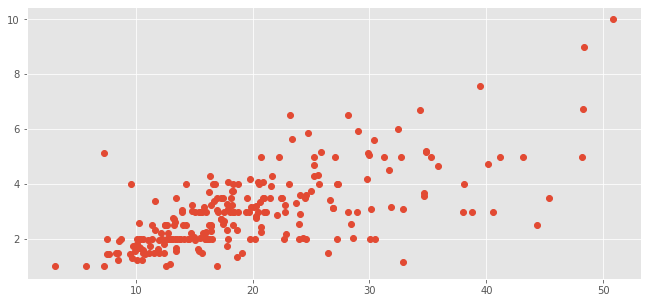

In [76]:
plt.plot(tip['total_bill'],tip['tip'],"o")
plt.show()

In [77]:
feature = tip['total_bill']
target = tip['tip']

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target)

In [79]:
X_train[:5]

array([16.99, 10.34, 21.01, 23.68, 24.59])

In [80]:
len(X_train)

170

In [81]:
len(X_test)

74

In [82]:
len(Y_train)

170

In [83]:
len(Y_test)

74

In [84]:
model = LinearRegression()

In [85]:
model.fit(X_train,Y_train)

In [86]:
model.coeff_

0.11542662114003696

In [87]:
model.intercept_

0.7229149050289241

In [88]:
pred = model.predict(X_test)

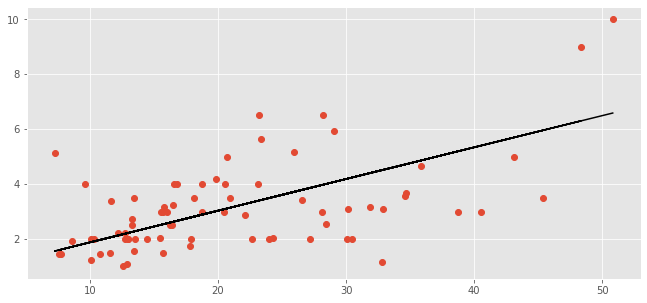

In [89]:
plt.plot(X_test,Y_test,'o')
plt.plot(X_test,pred,'k')
plt.show()

In [92]:
train_pred = model.predict(X_train)

In [93]:
train_pred

array([2.6840132 , 1.91642617, 3.14802822, 3.45621729, 3.56125552,
       3.64205415, 1.73520637, 3.82558248, 2.45893129, 2.42892037,
       1.9083463 , 4.79285757, 2.5027934 , 2.85022753, 2.4346917 ,
       3.21382139, 1.9152719 , 2.60321456, 2.68170467, 3.10647463,
       2.79135996, 3.06492105, 2.54319272, 5.27303231, 3.01067054,
       2.77866303, 2.26616883, 2.18767873, 3.22767258, 2.99104801,
       1.82523914, 2.8409934 , 2.46123982, 3.1110917 , 2.77520023,
       3.50007941, 2.6055231 , 2.6770876 , 2.88023845, 4.33230535,
       2.57435791, 2.73826371, 2.331962  , 1.8402446 , 4.23188419,
       2.83406781, 3.28884869, 4.46273743, 4.01834494, 2.80521115,
       2.17036473, 1.91065484, 4.74091559, 1.87025552, 3.67321934,
       2.97257975, 5.11028077, 3.77133197, 2.02031013, 6.29455791,
       3.06492105, 2.31695654, 1.99491627, 2.83406781, 2.75326917,
       3.04068146, 2.62168282, 1.07727463, 3.05799545, 2.45546849,
       2.11034289, 2.69324733, 3.82327395, 3.64089989, 2.42314

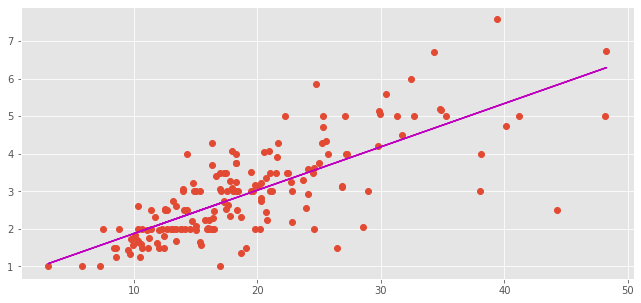

In [94]:
plt.plot(X_train,Y_train,'o')
plt.plot(X_train,train_pred,'m')
plt.show()

In [95]:
model.mse(Y_test,pred)

1.9663258714795904

In [96]:
model.mae(Y_test,pred)

1.0804305753859376

In [98]:
print("\n Accuray of my model is : ",model.r2_score(Y_test,pred)*100,"%")


 Accuray of my model is :  98.64864864864865 %


In [102]:
X_train[5]

25.29

In [103]:
p = model.predict(X_train[5])

In [104]:
p

3.642054153660459

In [105]:
Y_train[5]

4.71

#### Now lets try with Scikit Learn Library

    Modify the function train_test_split by adding the arguments for % of training and testing
    def train_test_split(feature,target,train_per,test_per)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error

In [107]:
import sklearn

In [108]:
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', 'base', 'clone', 'config_context', 'exceptions', 'externals', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'os', 'preprocessing', 're', 'set_config', 'setup_module', 'show_versions', 'svm', 'sys', 'utils', 'warnings']


In [112]:
feature

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [113]:
target

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [160]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target)

In [161]:
X_train[:5]

16     10.33
64     17.59
186    20.90
208    24.27
149     7.51
Name: total_bill, dtype: float64

In [137]:
Y_train[:5]

92     1.00
0      1.01
177    2.00
95     4.73
49     3.00
Name: tip, dtype: float64

In [138]:
len(X_test)

61

In [139]:
len(Y_test)

61

In [140]:
X_test[:5]

136    10.33
140    17.47
54     25.56
204    20.53
151    13.13
Name: total_bill, dtype: float64

In [141]:
Y_test[:5]

136    2.00
140    3.50
54     4.34
204    4.00
151    2.00
Name: tip, dtype: float64

In [121]:
len(X_train)

183

In [142]:
model = LinearRegression()

In [143]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
type(model)

sklearn.linear_model.base.LinearRegression

In [165]:
X_train = np.array(X_train).reshape(-1,1)

In [166]:
X_train.shape

(183, 1)

In [129]:
X_train.ndim

2

In [130]:
np.array(Y_train).reshape(1,-1)

array([[ 3.06,  2.3 ,  3.08,  2.72,  2.34,  1.71,  3.14,  2.  ,  2.6 ,
         3.07,  4.34,  3.5 ,  4.08,  1.5 ,  3.21,  3.12,  3.  ,  4.  ,
         3.  ,  2.5 ,  2.01,  3.  ,  3.16,  4.73,  4.3 ,  4.  ,  4.  ,
         2.05,  3.  ,  3.92,  1.17,  3.25,  4.29,  5.  ,  2.45,  3.68,
         5.  ,  4.06,  2.5 ,  3.  ,  1.58,  1.01,  1.92, 10.  ,  3.  ,
         3.5 ,  3.41,  1.  ,  3.  ,  2.83,  4.19,  2.52,  1.  ,  3.  ,
         1.25,  1.66,  1.5 ,  1.5 ,  2.5 ,  3.39,  3.  ,  1.44,  1.48,
         3.02,  1.68,  2.55,  2.5 ,  2.  ,  1.5 ,  2.  ,  5.92,  2.2 ,
         2.47,  5.16,  4.3 ,  3.5 ,  2.  ,  3.5 ,  4.5 ,  2.54,  3.48,
         2.  ,  3.  ,  3.61,  4.  ,  2.  ,  1.1 ,  2.5 ,  3.51,  1.8 ,
         3.23,  5.  ,  3.76,  2.92,  1.97,  1.  ,  4.67,  1.67,  3.18,
         1.25,  5.  ,  5.17,  2.02,  3.15,  1.5 ,  1.5 ,  2.  ,  5.  ,
         1.56,  6.73,  5.  ,  1.73,  3.5 ,  3.5 ,  2.75,  3.71,  2.31,
         1.5 ,  1.63,  3.  ,  2.  ,  1.44,  6.7 ,  2.  ,  2.88,  3.  ,
      

In [167]:
Y_train = np.array(Y_train).reshape(-1,1)

In [168]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
model.coef_

array([[0.10117219]])

In [170]:
model.intercept_

array([0.99955723])

In [171]:
pred = model.predict(np.array(X_test).reshape(-1,1))

In [172]:
pred[:5]

array([[4.20772727],
       [2.36639347],
       [3.24861494],
       [4.01448839],
       [3.49952196]])

In [173]:
Y_test = np.array(Y_test).reshape(-1,1)

In [174]:
Y_test[:5]

array([[4.5 ],
       [2.  ],
       [5.  ],
       [4.2 ],
       [5.85]])

In [175]:
mean_absolute_error(Y_test,pred)

0.8205523604634551

In [176]:
mean_squared_error(Y_test,pred)

1.1534939363457717

In [177]:
r2_score(Y_test,pred)

0.47519638945580245

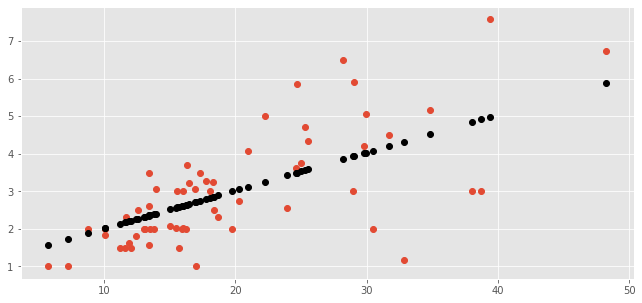

In [178]:
plt.plot(X_test,Y_test,'o')
plt.plot(X_test,pred,'ko')
plt.show()

In [179]:
y_pred = model.predict(X_train)

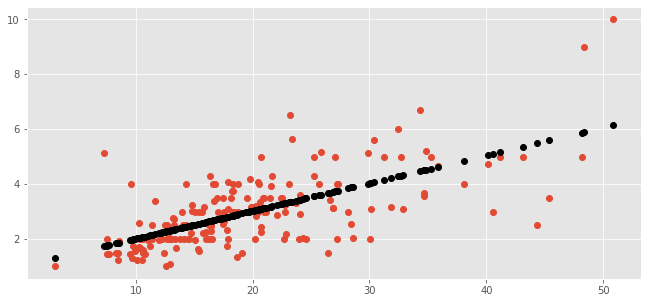

In [180]:
plt.plot(X_train,Y_train,'o')
plt.plot(X_train,y_pred,'ko')
plt.show()

In [183]:
r2_score(Y_train,y_pred)

0.44820950318487385

In [238]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target,random_state=11)

In [239]:
model = LinearRegression()
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)
model.fit(X_train,Y_train)
pred = model.predict(np.array(X_test).reshape(-1,1))
#Y_test = np.array(Y_test).reshape(-1,1)


In [240]:
r2_score(Y_test,pred)

0.5423984391412915

    Single Linear Regression
    
        Feature is single
        Target is single
        
    Multiple Linear Regression
    
        Features is multiple
        Target is single
        
    Multinomial
        
        Features is multiple
        Target is multiple
        
     Polynomial Regression

In [241]:
### mpg, 

In [242]:
# multiple, polynomial regression